In [1]:
#https://www.geeksforgeeks.org/python-implementation-of-movie-recommender-system/
import pandas as pd
import seaborn as sns

column_names = ['user_id', 'item_id','rating', 'timestamp'] 

path = open("/Users/kumarsanjeev/Downloads/file.tsv")
df = pd.read_csv(path,sep = "\t", names = column_names)
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [34]:
path1 = open("/Users/kumarsanjeev/Downloads/Movie_Id_Titles.csv")
movie_titles = pd.read_csv(path1) 
movie_titles.head() 

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [35]:
data = pd.merge(df, movie_titles, on='item_id') 

In [36]:
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [37]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [38]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [39]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
  
ratings.head() 

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 

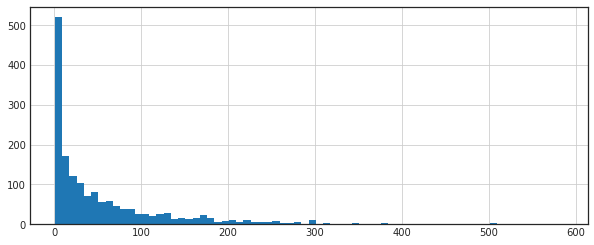

In [41]:
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 

In [42]:
moviemat = data.pivot_table(index ='user_id', 
              columns ='title', values ='rating') 
  
moviemat.head() 
  
ratings.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [6]:
import spacy

nlp = spacy.load('en_core_web_sm')
#doc = nlp(u"I want a new laptop.")
# for chunk in doc.noun_chunks:
#     print(chunk.root.head.text)
chunk.root.head.text    

'want'

In [12]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(u"I want to have  a new laptop.")
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

I I nsubj want
a new laptop laptop dobj have


In [21]:

import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
#import mpld3

path = open("/Users/kumarsanjeev/Desktop/Title.csv")
df = pd.read_csv(path,sep = "\t", names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,The Godfather,NaN,NaN,NaN
1,The Shawshank Redemption,NaN,NaN,NaN
2,Schindler's List,NaN,NaN,NaN
3,Raging Bull,NaN,NaN,NaN
4,Casablanca,NaN,NaN,NaN


In [22]:
df[:10]

,user_id,item_id,rating,timestamp
0,The Godfather,NaN,NaN,NaN
1,The Shawshank Redemption,NaN,NaN,NaN
2,Schindler's List,NaN,NaN,NaN
3,Raging Bull,NaN,NaN,NaN
4,Casablanca,NaN,NaN,NaN
5,One Flew Over the Cuckoo's Nest,NaN,NaN,NaN
6,Gone with the Wind,NaN,NaN,NaN
7,Citizen Kane,NaN,NaN,NaN
8,The Wizard of Oz,NaN,NaN,NaN
9,Titanic,NaN,NaN,NaN


In [31]:
df["user_id"][0][:7]
#print (df[0][:4])

'The God'